<a href="https://colab.research.google.com/github/RiRa25/Loan-Prediction-System/blob/main/OEA_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np


***Read the Dataset***

In [2]:
df = pd.read_csv('/content/outputfinal (1).csv')
df.head()

,income_annum,loan_amount,loan_term,cibil_score,loan_status
0,9600000,29900000,12,778,1
1,4100000,12200000,8,417,0
2,9100000,29700000,20,506,0
3,8200000,30700000,8,467,0
4,9800000,24200000,20,382,0


In [3]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]

***Training and Testing the Data***

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=42)

***Random Forest classsifier***

In [5]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9812646370023419


In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       471
           1       0.98      0.99      0.99       810

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[454  17]
 [  7 803]]


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision_approved = precision_score(y_test, y_pred, pos_label=1)
precision_rejected = precision_score(y_test, y_pred, pos_label=0)

# Calculate recall
recall_approved = recall_score(y_test, y_pred, pos_label=1)
recall_rejected = recall_score(y_test, y_pred, pos_label=0)

print("Accuracy:", accuracy)
print("Precision (Approved Loans):", precision_approved)
print("Precision (Rejected Loans):", precision_rejected)
print("Recall (Approved Loans):", recall_approved)
print("Recall (Rejected Loans):", recall_rejected)

Accuracy: 0.9812646370023419
Precision (Approved Loans): 0.9792682926829268
Precision (Rejected Loans): 0.9848156182212582
Recall (Approved Loans): 0.991358024691358
Recall (Rejected Loans): 0.9639065817409767


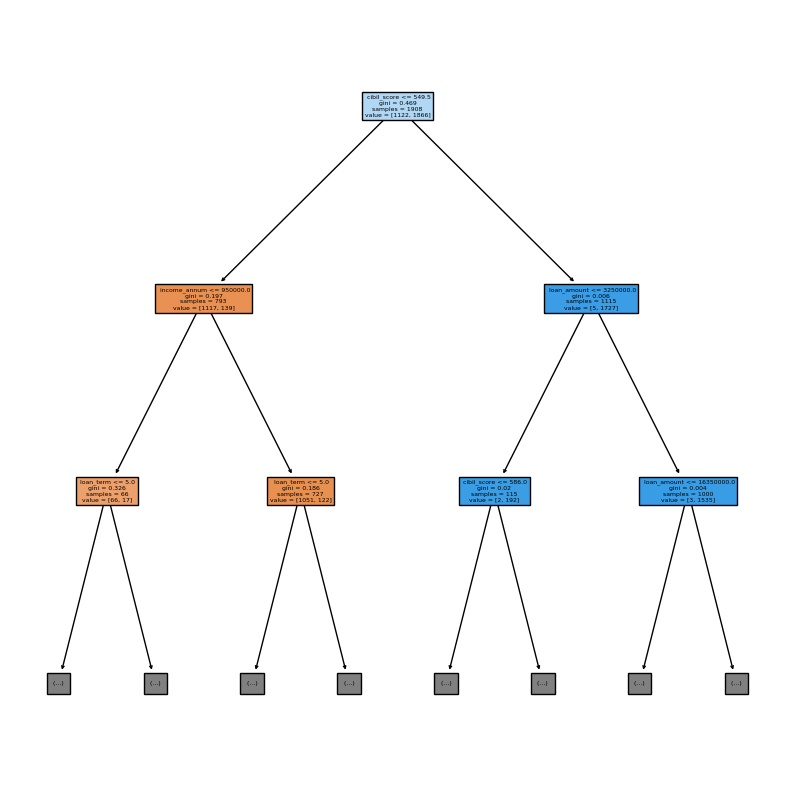

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming rf_model is your trained Random Forest Classifier model
# Get one of the decision trees from the Random Forest
tree_to_display = rf_classifier.estimators_[0]  # Change index to select a different tree

# Visualize the decision tree
plt.figure(figsize=(10, 10))
tree.plot_tree(tree_to_display, filled=True, feature_names=X.columns, max_depth=2)
plt.show()